In [2]:
import pickle

with open("ERL.pickle", 'rb') as in_file:
	rf = pickle.load(in_file)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay

In [ ]:
import shap
import pickle
import pandas as pd

variables = ['JPO4', 'POPR', 'JPON', 'sat_def', 'snowpack', 'PO4T2R', 'JPOP', 'baseflow', r'%sat_area', '0_redux', 'evap', 'trans']

print('Loading files...')
target_variable = 'CHLAVESurfaceMean'
with open("ERL.pickle", 'rb') as in_file:
	rf = pickle.load(in_file)
test = pd.read_csv('ERL_test.csv', nrows=100)
x_test = test.drop(target_variable, axis=1)
print('Done loading.')

print('Calculating SHAP values...')
explainer = shap.Explainer(rf, x_test[variables[0:3]])
shap_values = explainer(x_test[variables[0:3]])

print('Plotting...')
shap.initjs()
shap.waterfall_plot(shap_values[0])
shap.summary_plot(shap_values, x_test)
shap.summary_plot(shap_values, x_test, plot_type='bar')


Loading files...
Done loading.
Calculating SHAP values...


In [1]:
import shap
import pickle
import pandas as pd

variables = ['JPO4', 'POPR', 'JPON', 'sat_def', 'snowpack', 'PO4T2R', 'JPOP', 'baseflow', r'%sat_area', '0_redux', 'evap', 'trans']

print('Loading files...')
target_variable = 'CHLAVESurfaceMean'
with open("ERL.pickle", 'rb') as in_file:
	rf = pickle.load(in_file)
test = pd.read_csv('ERL_test.csv', nrows=100)
x_test = test.drop(target_variable, axis=1)
print('Done loading.')

x_test[variables[0:3]]


Loading files...
Done loading.


,JPO4,POPR,JPON
0,0.394336,0.119059,1.825870
1,0.683888,0.121994,3.015696
2,2.783631,0.124897,12.151146
3,10.419283,0.136779,7.015646
4,9.981455,0.127480,4.940993
...,...,...,...
95,8.154904,0.124026,7.922630
96,0.061859,0.099726,3.702999
97,1.476229,0.123584,5.956326
98,2.724751,0.132239,11.480945


In [1]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

variables = ['JPO4', 'POPR', 'JPON', 'sat_def', 'snowpack', 'PO4T2R', 'JPOP', 'baseflow', r'%sat_area', '0_redux', 'evap', 'trans']
csv='comboCSV'

print('Loading files...')
with open(csv+".pickle", 'rb') as in_file:
	rf = pickle.load(in_file)
x_train_samp = pd.read_csv(csv+'_train_5000.csv')
#x_train_samp = pd.read_csv(csv+'_train.csv', nrows=1000)

# 1000 = 8 min, 16 min combo
# 5000 = Dies
# 10000 = Dies

fig = plt.figure(figsize=(10,16))
fig.suptitle(f'Partial Dependence Plots for {csv}', y=.9)
pdd = PartialDependenceDisplay.from_estimator(rf, x_train_samp, variables, ax=plt.gca(), n_jobs=20, verbose=1)


Loading files...


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.


: 

Loading files...


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.


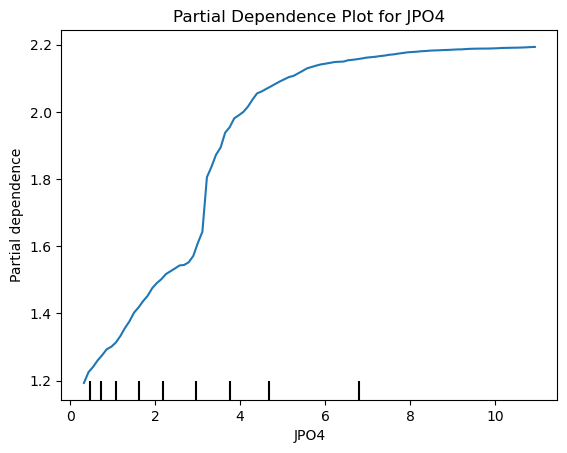

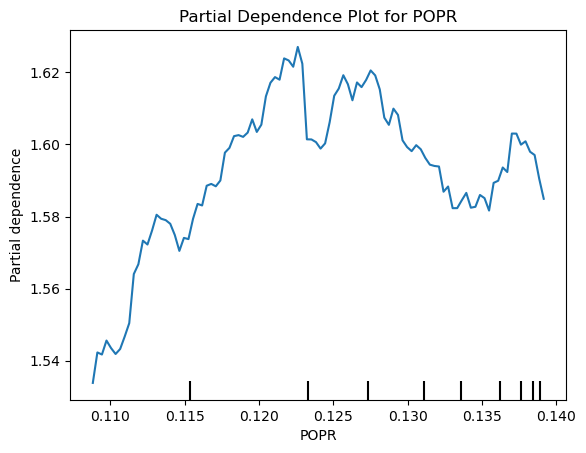

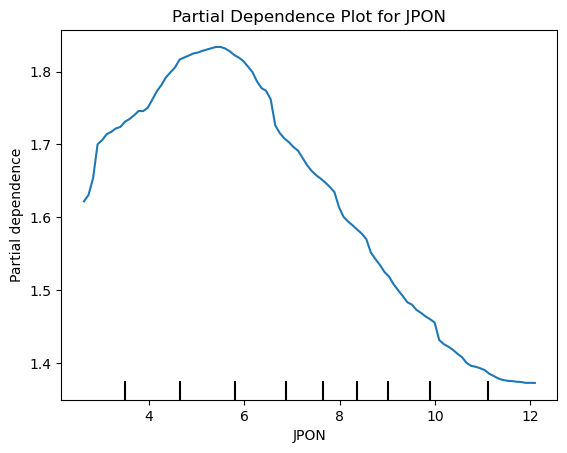

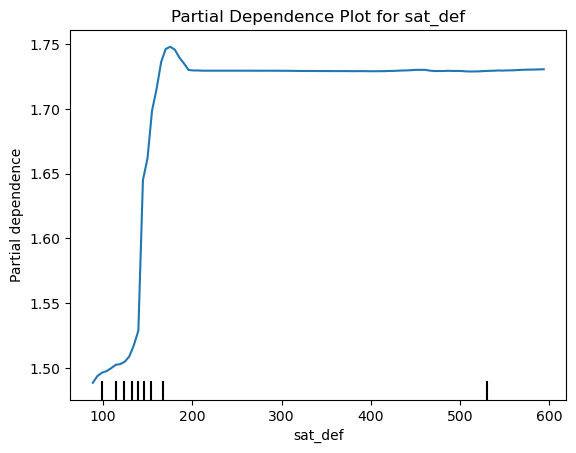

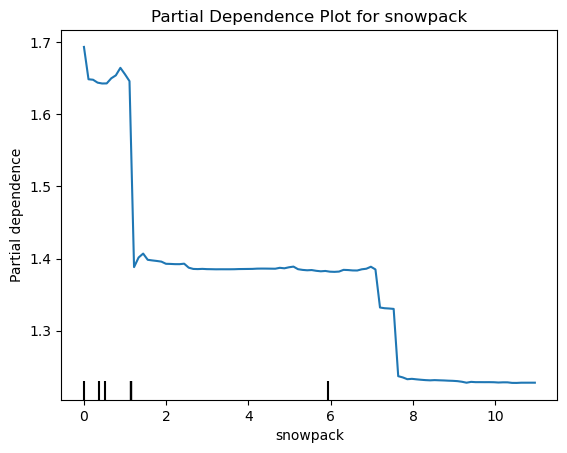

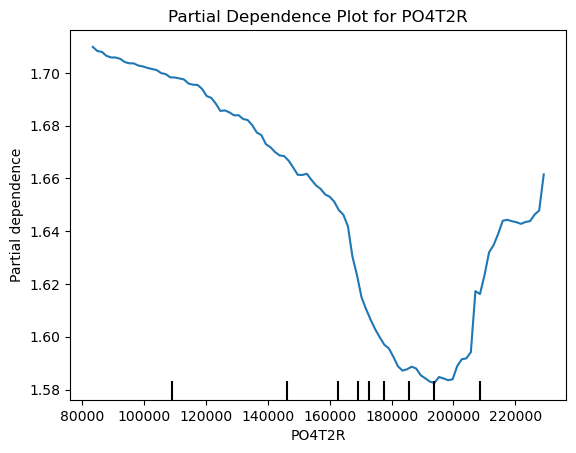

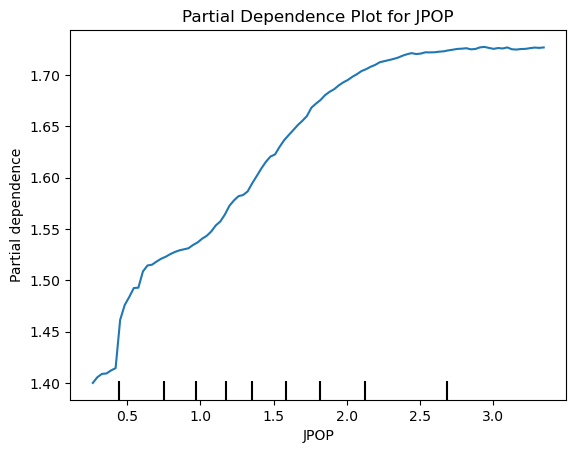

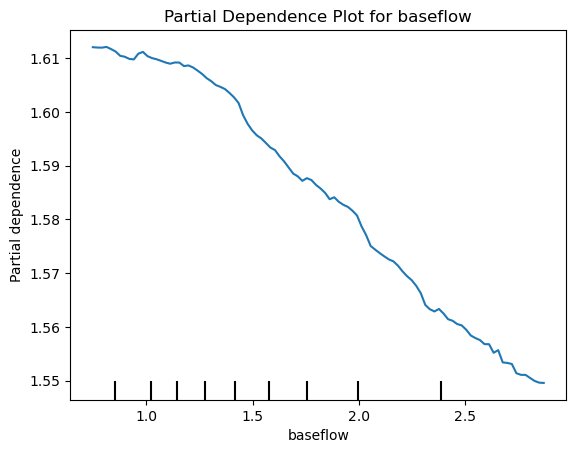

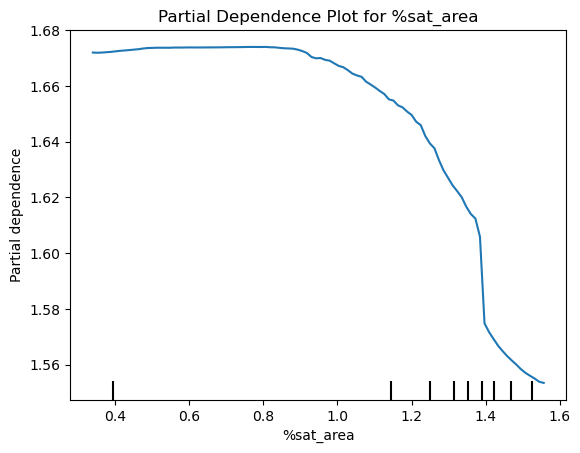

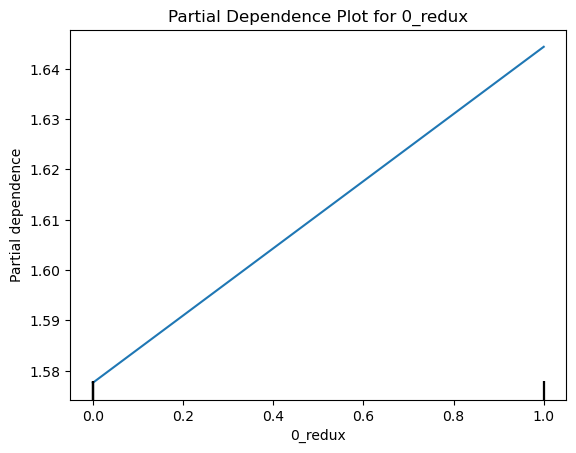

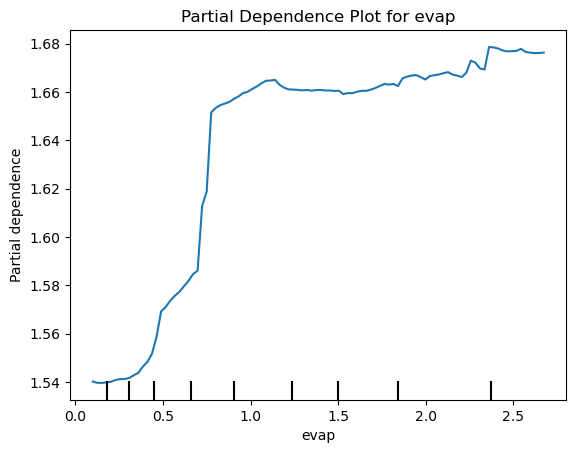

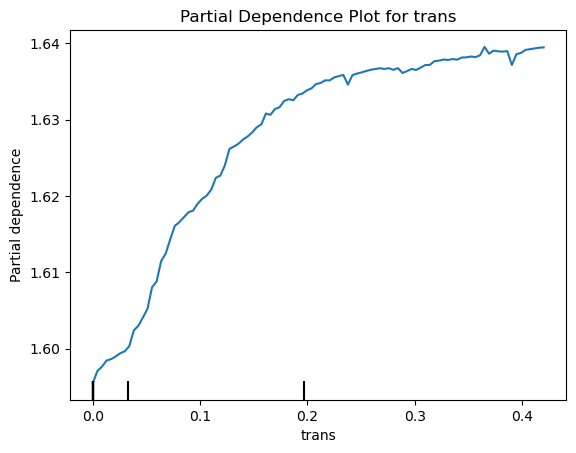

In [6]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

variables = ['JPO4', 'POPR', 'JPON', 'sat_def', 'snowpack', 'PO4T2R', 'JPOP', 'baseflow', r'%sat_area', '0_redux', 'evap', 'trans']
csv='comboCSV'

print('Loading files...')
with open(csv+".pickle", 'rb') as in_file:
	rf = pickle.load(in_file)
x_train_samp = pd.read_csv(csv+'_train_1000.csv')
#x_train_samp = pd.read_csv(csv+'_train.csv', nrows=1000)

# 1000 = 8 min, 16 min combo
# 5000 = Dies
# 10000 = Dies

for variable in variables:
	pdd = PartialDependenceDisplay.from_estimator(rf, x_train_samp, [variable], n_jobs=20, verbose=1)
	plt.gca().set_title(f'Partial Dependence Plot for {variable}')
	plt.savefig(f'PDP_{variable}.png')

[<Axes: > <Axes: > <Axes: > <Axes: >]
JPO4
Axes(0.125,0.53;0.352273x0.35)


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.


POPR
Axes(0.547727,0.53;0.352273x0.35)


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.


JPON
Axes(0.125,0.11;0.352273x0.35)


/raid/conda-envs/ciroh/lib/python3.11/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.


sat_def
Axes(0.547727,0.11;0.352273x0.35)


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.


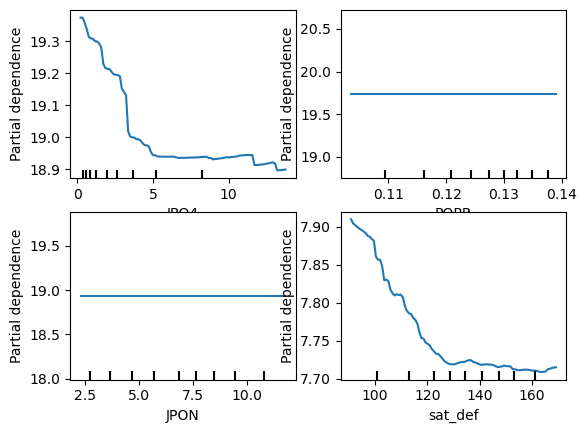

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for var, axis in zip(variables[0:4], axes.flatten()):
	print(f'Working on {var}...')
	PartialDependenceDisplay.from_estimator(rf, x_train, [var], ax=axis, n_jobs=20, verbose=1)


Loading files...
Done loading.


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    3.0s finished


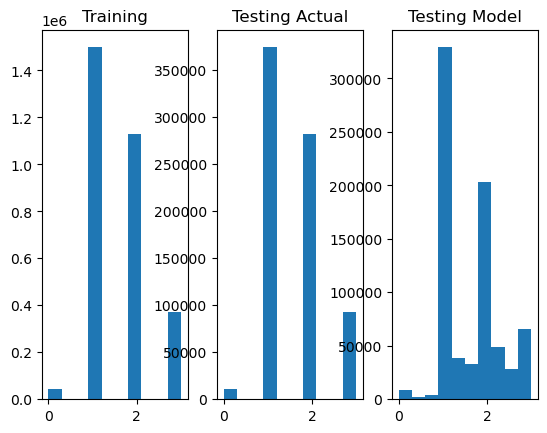

In [4]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

print('Loading files...')
target_variable = 'CHLAClass'
with open("comboCSV.pickle", 'rb') as in_file:
	rf = pickle.load(in_file)
train = pd.read_csv('comboCSV_train.csv')
# x_train = train.drop(train.columns[0], axis=1).drop(target_variable, axis=1)
x_train = train.drop(target_variable, axis=1)
y_train = train[target_variable]
test = pd.read_csv('comboCSV_test.csv')
# x_test = test.drop(test.columns[0], axis=1).drop(target_variable, axis=1)
x_test = test.drop(target_variable, axis=1)
y_test = test[target_variable]
print('Done loading.')

eval = rf.predict(x_test)

hists = [(y_train, "Training"),
		 (y_test, "Testing Actual"),
		 (eval, "Testing Model")]
fig, axes = plt.subplots(nrows=1, ncols=3)
for axis, plot in zip(axes.flatten(), hists):
	axis.hist(plot[0])
	axis.set_title(plot[1])

In [5]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

csv='comboCSV'

print('Loading files...')
target_variable = 'CHLAClass'
train = pd.read_csv(csv+'_train.csv')
x_train = train.drop(target_variable, axis=1)
x_train.iloc[np.random.choice(len(x_train), size=1000, replace=False)].to_csv(csv+'_train_1000.csv', index=False)
x_train.iloc[np.random.choice(len(x_train), size=5000, replace=False)].to_csv(csv+'_train_5000.csv', index=False)

Loading files...


In [2]:
# eval = rf.predict(x_test)

hists = [(y_train, "Training"),
		 (y_test, "Testing Actual"),
		 (eval, "Testing Model")]
fig, axes = plt.subplots(nrows=1, ncols=3)
for axis, plot in zip(axes.flatten(), hists):
	axis.hist(plot[0])
	axis.set_title(plot[1])



NameError: name 'y_train' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
import pandas as pd
import numpy as np
import os

experiment = "20250813comboCSVclassTargetClassifier"

print('Loading files...')
target_variable = 'CHLAClass'
with open(os.path.join(experiment, "comboCSV.pickle"), 'rb') as in_file:
	rf = pickle.load(in_file)
train = pd.read_csv(os.path.join(experiment, 'comboCSV_train.csv'))
# x_train = train.drop(train.columns[0], axis=1).drop(target_variable, axis=1)
x_train = train.drop(target_variable, axis=1)
y_train = train[target_variable]
test = pd.read_csv(os.path.join(experiment, 'comboCSV_test.csv'))
# x_test = test.drop(test.columns[0], axis=1).drop(target_variable, axis=1)
x_test = test.drop(target_variable, axis=1)
y_test = test[target_variable]
print('Done loading.')

eval = rf.predict(x_test)

# hists = [(y_train, "Training"),
# 		 (y_test, "Testing Actual"),
# 		 (eval, "Testing Model")]
# fig, axes = plt.subplots(nrows=1, ncols=3)
# for axis, plot in zip(axes.flatten(), hists):
# 	axis.hist(plot[0])
# 	axis.set_title(plot[1])




Loading files...
Done loading.


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    3.4s finished


NameError: name 'cm' is not defined

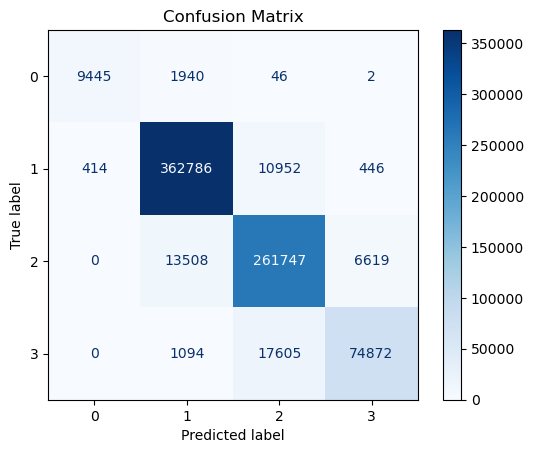

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# https://www.geeksforgeeks.org/machine-learning/how-to-plot-confusion-matrix-with-labels-in-sklearn/ 

conf_matrix = confusion_matrix(y_test, eval)
conf_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_plot.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

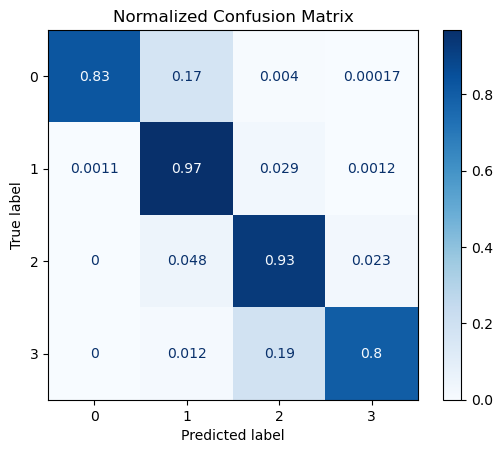

In [7]:
conf_matrix = confusion_matrix(y_test, eval)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_plot.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.show()

In [3]:
conf_matrix


array([[  9445,   1940,     46,      2],
       [   414, 362786,  10952,    446],
       [     0,  13508, 261747,   6619],
       [     0,   1094,  17605,  74872]])